In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [3]:
df_p = pd.read_csv('../data/raw/student-por.csv', delimiter=';')

In [4]:
# merges the math and portuguese dataframes together

#frames = [df_m, df_p]
#df = pd.concat(frames)

In [5]:
df_p.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [6]:
df_p.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


# Univariate Analysis

We want to gather some visualization analysis to help us understand the two dataframes more

<Axes: xlabel='Medu', ylabel='Count'>

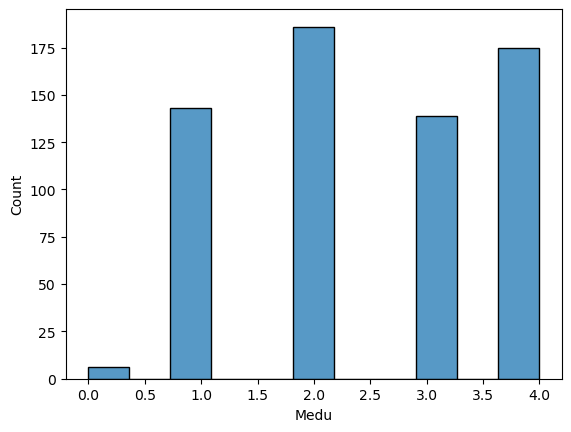

In [7]:
# plot a seaborn histogram for "Mothers education" column in the df_m dataframe
sns.histplot(data=df_p, x ='Medu')

<Axes: xlabel='Fedu', ylabel='Count'>

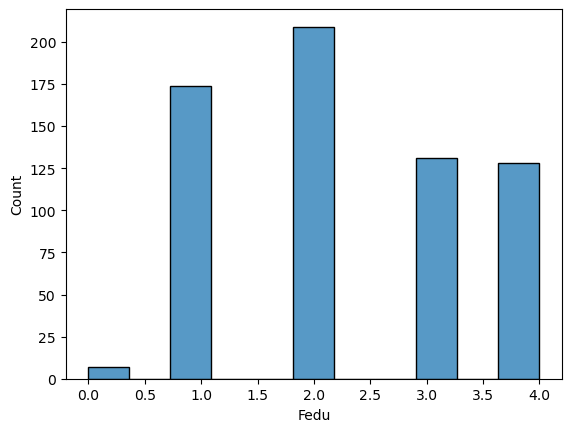

In [8]:
# plot a seaborn histogram for "Fathers education" column in the df_m dataframe
sns.histplot(data=df_p, x ='Fedu')

<Axes: xlabel='G1', ylabel='Count'>

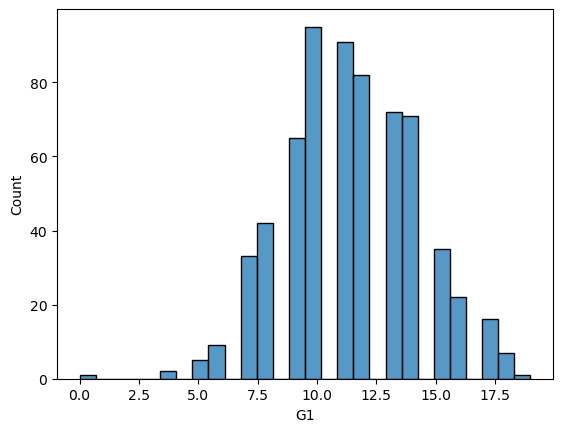

In [9]:
sns.histplot(data=df_p, x = 'G1')

<Axes: xlabel='G2', ylabel='Count'>

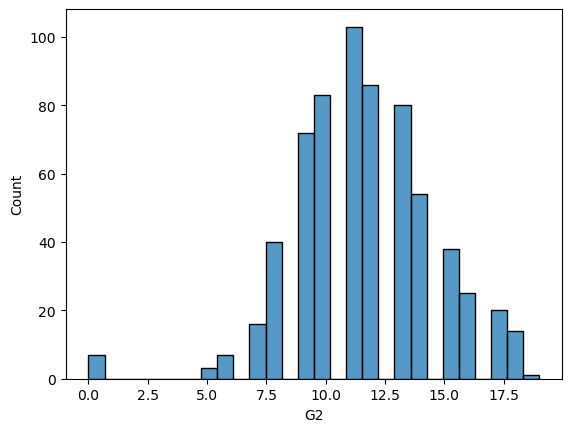

In [10]:
sns.histplot(data=df_p, x = 'G2')

<Axes: xlabel='G3', ylabel='Count'>

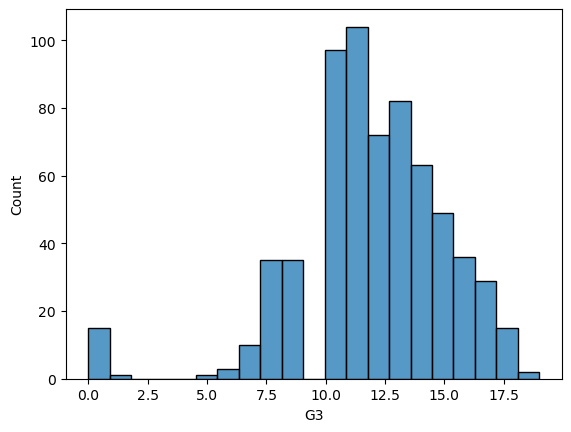

In [11]:
sns.histplot(data=df_p, x = 'G3')

In [12]:
p_grades = df_p["G2"] + df_p["G1"] + df_p["G3"]
p_grades.head()

0    22
1    31
2    37
3    42
4    37
dtype: int64

<Axes: ylabel='Count'>

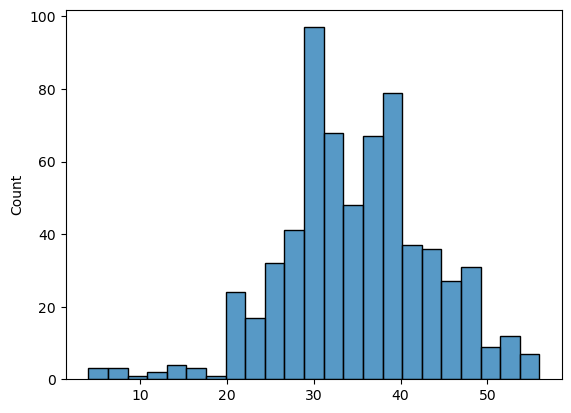

In [13]:
sns.histplot(p_grades)

<Axes: xlabel='Mjob', ylabel='Count'>

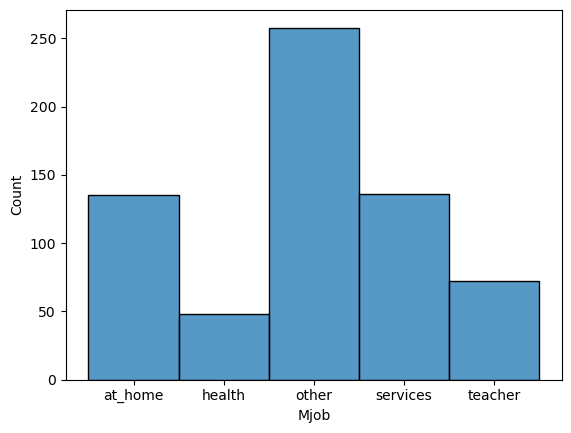

In [14]:
# plot a seaborn histogram for the Mothers Profession status column in the df_m dataframe
sns.histplot(data=df_p, x ='Mjob')

<Axes: xlabel='Fjob', ylabel='Count'>

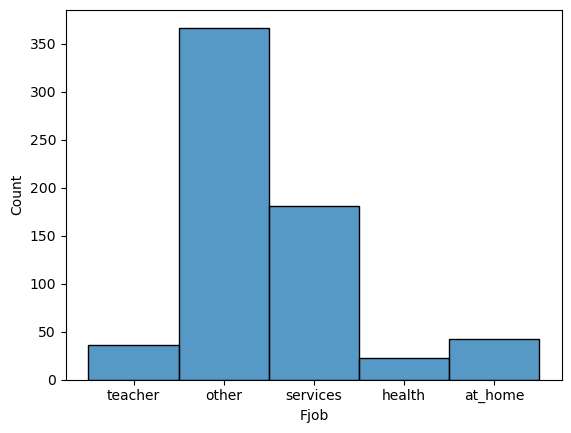

In [15]:
# plot a seaborn histogram for the Fathers Profession status column in the df_m dataframe
sns.histplot(data=df_p, x ='Fjob')

In [16]:
Fjob_counts_p = df_p['Fjob'].value_counts()
Fjob_counts_p

Fjob
other       367
services    181
at_home      42
teacher      36
health       23
Name: count, dtype: int64

<Axes: xlabel='Fjob'>

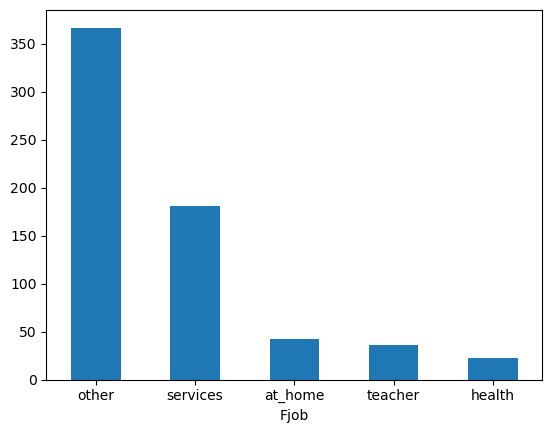

In [17]:
Fjob_counts_p.plot.bar(rot=0)

In [18]:
Mjob_counts_p = df_p['Mjob'].value_counts()
Mjob_counts_p

Mjob
other       258
services    136
at_home     135
teacher      72
health       48
Name: count, dtype: int64

<Axes: xlabel='Mjob'>

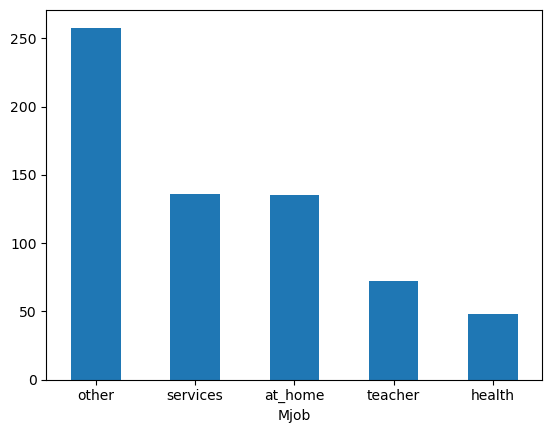

In [19]:
Mjob_counts_p.plot.bar(rot=0)

In [20]:
Fedu_counts_p = df_p['Fedu'].value_counts()
Fedu_counts_p

Fedu
2    209
1    174
3    131
4    128
0      7
Name: count, dtype: int64

<Axes: xlabel='Fedu'>

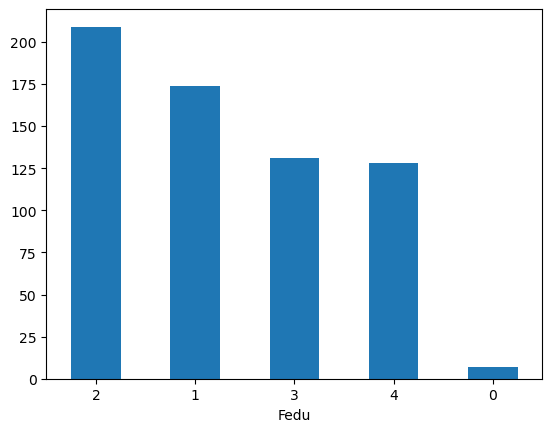

In [21]:
Fedu_counts_p.plot.bar(rot=0)

In [22]:
Medu_counts_p = df_p['Medu'].value_counts()
Medu_counts_p

Medu
2    186
4    175
1    143
3    139
0      6
Name: count, dtype: int64

<Axes: xlabel='Medu'>

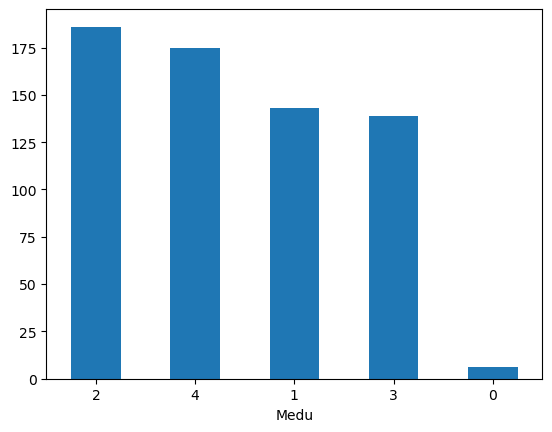

In [23]:
Medu_counts_p.plot.bar(rot=0)

In [24]:
grade_counts_p = p_grades.value_counts()
grade_counts_p

30    42
37    38
32    37
39    33
33    31
36    29
31    29
29    26
34    25
38    25
35    23
41    22
28    21
44    21
40    21
27    20
26    20
43    15
42    15
45    14
46    13
25    12
48    12
47    12
22    11
24     9
23     8
21     8
49     7
52     7
51     7
54     6
20     5
53     5
14     3
50     2
7      2
17     2
5      2
9      1
12     1
8      1
19     1
16     1
4      1
15     1
56     1
13     1
Name: count, dtype: int64

# Bivariate Analysis

Generating visualization for relationships between various variables to understand the patterns that are present in the dataset.

<Axes: xlabel='Fedu', ylabel='G1'>

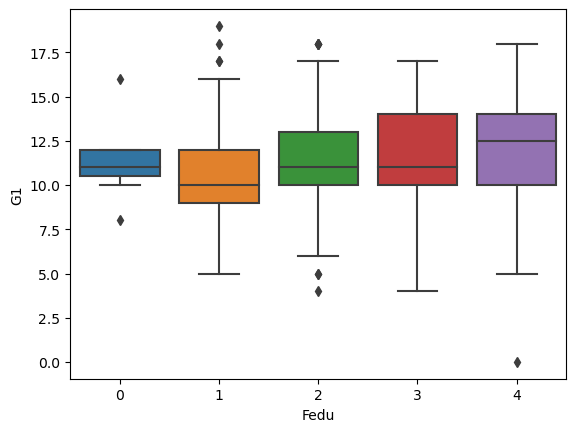

In [25]:
sns.boxplot(data=df_p, y ='G1', x = 'Fedu')

<Axes: xlabel='Fedu', ylabel='G2'>

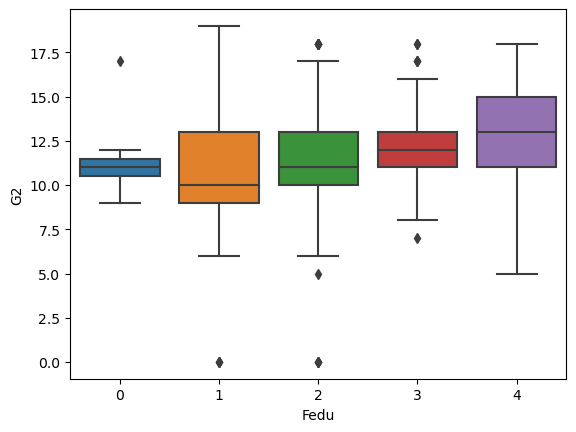

In [26]:
sns.boxplot(data=df_p, y ='G2', x = 'Fedu')

<Axes: xlabel='Fedu', ylabel='G3'>

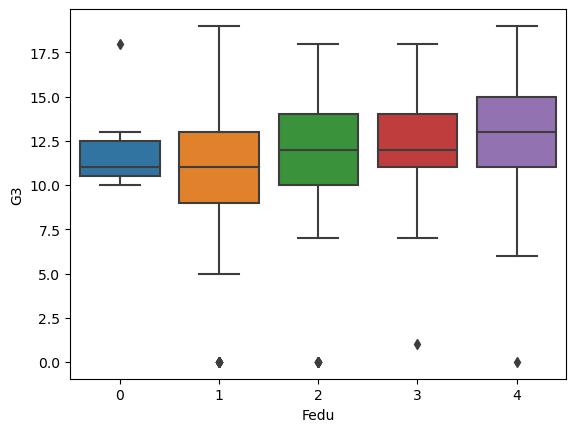

In [27]:
sns.boxplot(data=df_p, y ='G3', x = 'Fedu')

<Axes: xlabel='Medu', ylabel='G1'>

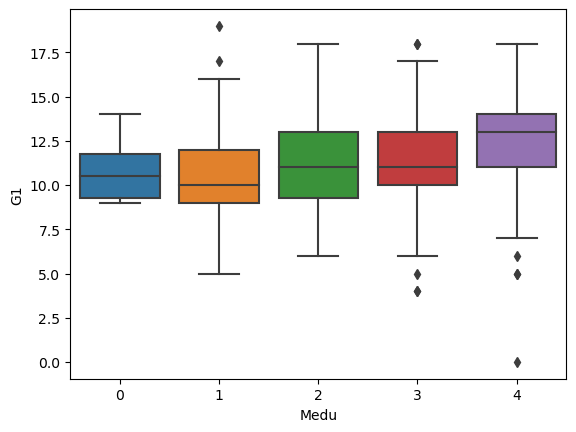

In [28]:
sns.boxplot(data=df_p, y ='G1', x = 'Medu')

<Axes: xlabel='Medu', ylabel='G2'>

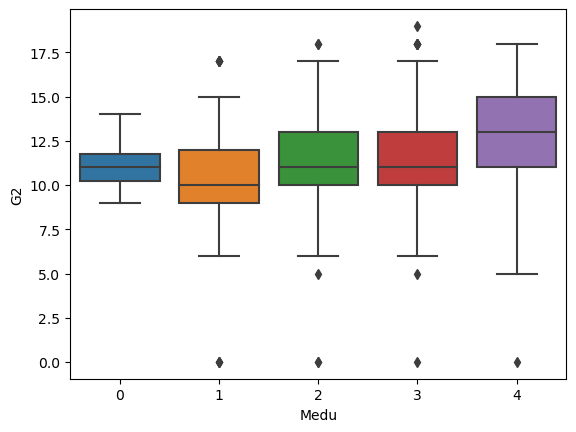

In [29]:
sns.boxplot(data=df_p, y ='G2', x = 'Medu')

<Axes: xlabel='Medu', ylabel='G3'>

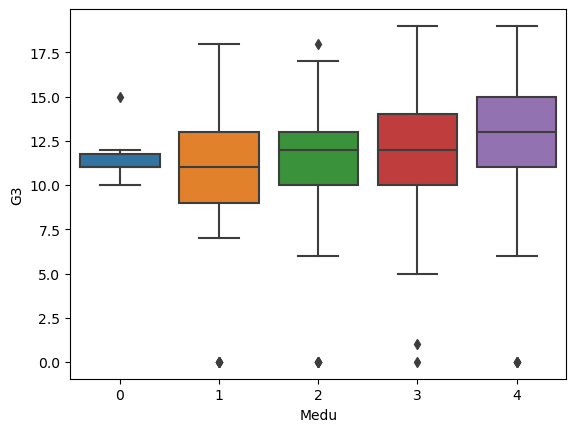

In [30]:
sns.boxplot(data=df_p, y ='G3', x = 'Medu')

<Axes: xlabel='Fjob', ylabel='G1'>

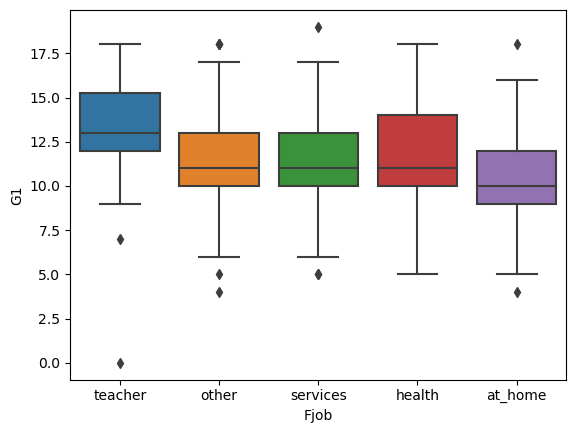

In [31]:
sns.boxplot(data=df_p, y ='G1', x = 'Fjob')

<Axes: xlabel='Fjob', ylabel='G2'>

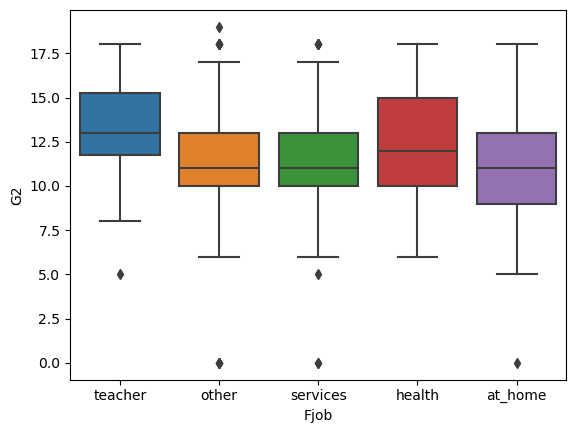

In [32]:
sns.boxplot(data=df_p, y ='G2', x = 'Fjob')

<Axes: xlabel='Fjob', ylabel='G3'>

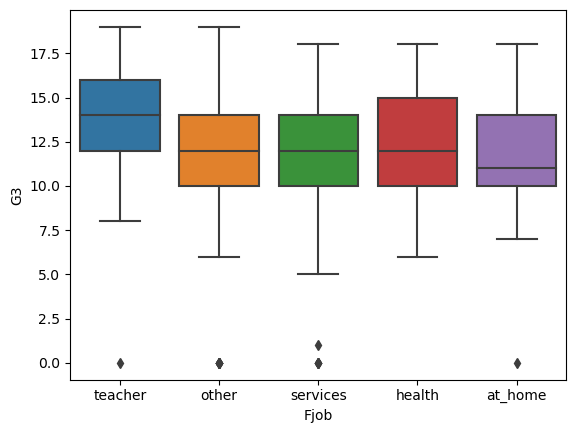

In [33]:
sns.boxplot(data=df_p, y ='G3', x = 'Fjob')

<Axes: xlabel='Mjob', ylabel='G1'>

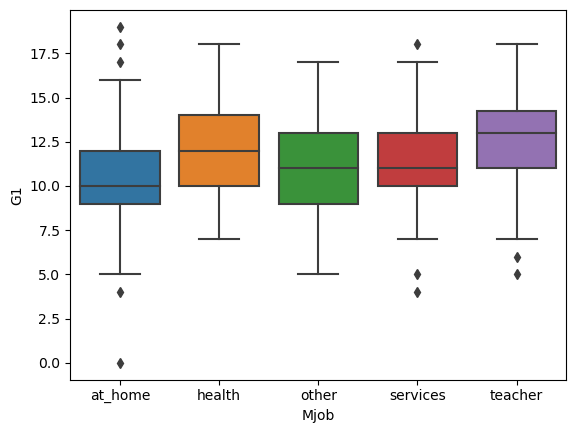

In [34]:
sns.boxplot(data=df_p, y ='G1', x = 'Mjob')

<Axes: xlabel='Mjob', ylabel='G2'>

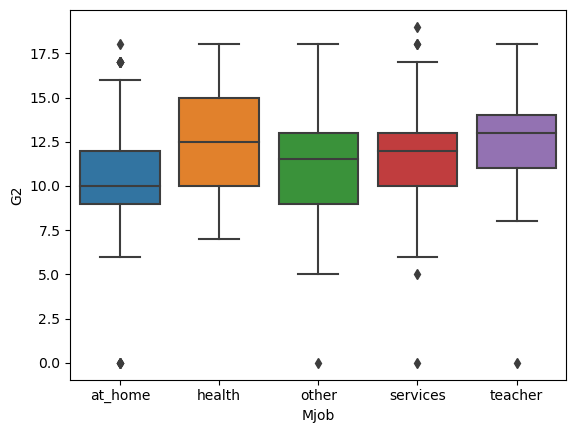

In [35]:
sns.boxplot(data=df_p, y ='G2', x = 'Mjob')

<Axes: xlabel='Mjob', ylabel='G3'>

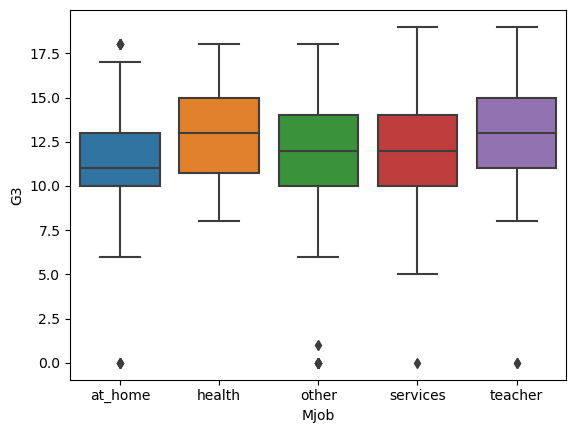

In [36]:
sns.boxplot(data=df_p, y ="G3", x = 'Mjob')

<Axes: xlabel='Mjob'>

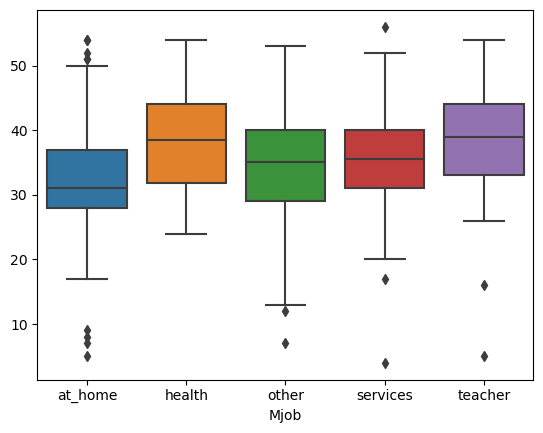

In [37]:
sns.boxplot(data=df_p, y =p_grades, x = 'Mjob')

<Axes: xlabel='Medu'>

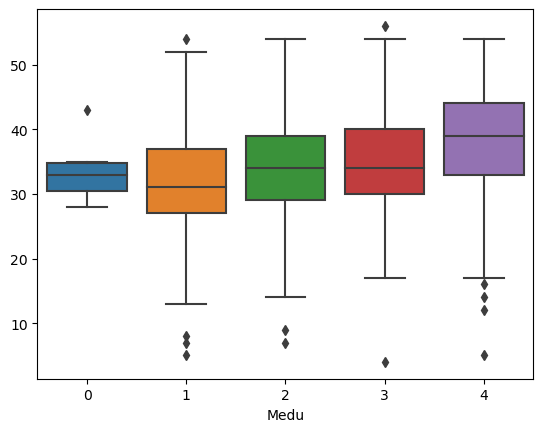

In [38]:
sns.boxplot(data=df_p, y =p_grades, x = 'Medu')

<Axes: xlabel='Fedu'>

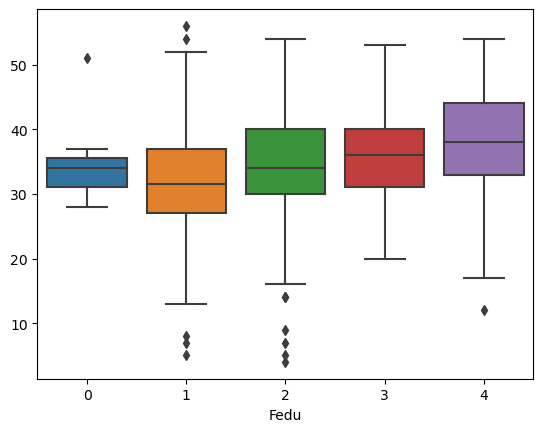

In [39]:
sns.boxplot(data=df_p, y =p_grades, x = 'Fedu')

<Axes: xlabel='Fjob'>

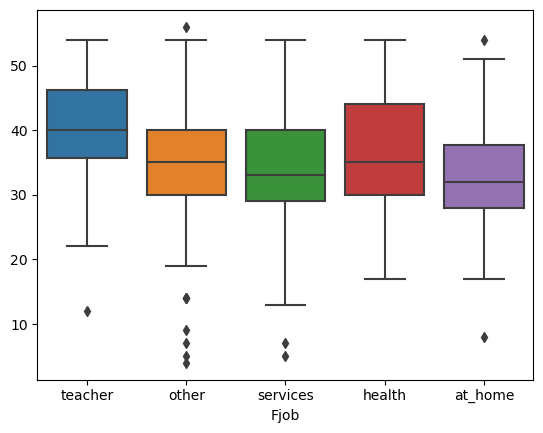

In [40]:
sns.boxplot(data=df_p, y =p_grades, x = 'Fjob')

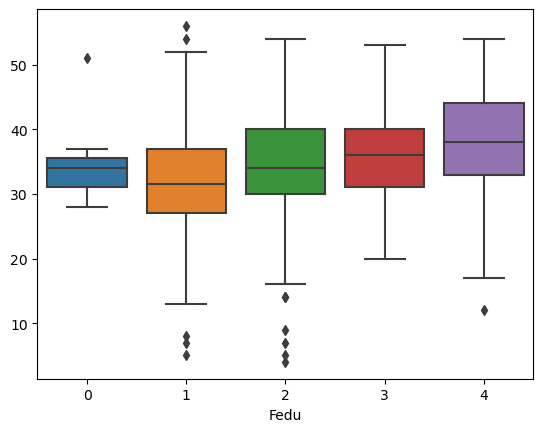

In [41]:
sns.boxplot(data=df_p, x="Fedu", y=p_grades)
plt.show()

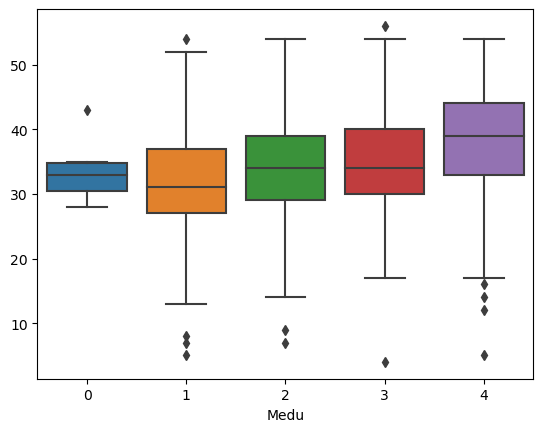

In [42]:
sns.boxplot(data=df_p, x="Medu", y=p_grades)
plt.show()

# Exploratory Data Analysis II
